In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  주제 복기 및 시각화 계획

**OTT 플랫폼 내 오리지널 콘텐츠의 영향력**을 보고자 했다. 

- 따라서, **꺽은 선 그래프로 전체와** 오리지널, 비 오리지널, **그룹 별 검색량 추세를 비교**해보기로 했다.

# 데이터 전처리

In [5]:
# 크롤링한 모든 데이터 불러오기

pd.set_option('max_columns', 100)

tag = pd.read_csv('./result/tag_original.csv') # 넷플릭스와 티빙 콘텐츠 태그 모음
k_age = pd.read_excel('./result/age_kakao.xlsx') # 연령별 카카오 검색량
k_geo = pd.read_excel('./result/region_kakao.xlsx') # 지역별 카카오 검색량
k_sex = pd.read_excel('./result/sex_kakao.xlsx') # 성별 카카오 검색량
k_search = pd.read_excel('./result/weekly_kakao.xlsx') # 콘텐츠별 카카오 검색량
n_like = pd.read_csv('./result/naver_list.csv') # 콘텐츠별 네이버 찜한 개수
i_like = pd.read_csv('./result/instagram crawling.csv') # 콘텐츠별 인스타 태그 개수
f_like = pd.read_csv('./result/facebook_crawl_data.csv') # 콘텐츠별 페이스북 태그 개수
go_search = pd.read_csv('./result/google_time_crawl.csv') # 콘텐츠별 구글 태그 개수
g_search = pd.read_csv('./result/google_time_crawl.csv')
g_geo = pd.read_csv('./result/google_geo_crawl.csv') # 지역별 구글 태그 개수

## 데이터 가공

In [6]:
# 티빙과 넷플릭스 전체 중복제거 콘텐츠 리스트

len(tag)

112

In [8]:
# 넷플릭스만 중복 제거한 콘텐츠 리스트 추출하기

n_unique = pd.read_csv('./netflix_only.csv')

len(n_unique)

55

In [199]:
# 티빙만 중복 제거한 콘텐츠 리스트 추출하기

# n_unique = pd.read_csv('./netflix_only.csv')

len(t_unique)

85

In [9]:
# 넷플릭스 오리지널 콘텐츠 리스트 추출하기

n_origin = list(tag[tag['original'] == 2]['tag_list'])

len(n_origin)

20

In [192]:
# 티빙 오리지널 콘텐츠 리스트 추출하기

t_origin = list(tag[tag['original'] == 1]['tag_list'])

len(t_origin)

5

## 비 오리지널 콘텐츠 리스트 추출하기

In [ ]:
# 넷플릭스 비 오리지널 콘텐츠 리스트 추출

## 태그 이름 가공

# n_ori = []
# for tit in n_unique['netflix']:
#     n_ori.append(tit.replace(' ', '').replace('_y', '').replace(':','').replace('언제나그리고영원히','').replace('.','').replace(',',''))

# np.array(n_ori)

# n_ori.remove('그녀의이름은난노시즌1')
# n_ori.remove('시지프스themyth')
# n_ori.remove('범인은바로너!시즌3')
# n_ori.remove('뤼팽파트1')
# n_ori.append('그녀의이름은난노')
# n_ori.append('시지프스')
# n_ori.append('범인은바로너시즌3')
# n_ori.append('뤼팽')


# 비 오리지널만 추출하기

# no_ori = []
# for tit in n_ori:
#     if tit not in n_origin:
#         no_ori.append(tit)

# len(no_ori) # 55 - 20 = 35

# no_ori.remove('귀멸의칼날')
# no_ori.remove('진격의거인TheFinalSeason')
# no_ori.append('극장판귀멸의칼날무한열차편')
# no_ori.append('진격의거인')

In [201]:
# 티빙 비 오리지널 콘텐츠만 추출하기

t_no_ori = []
for tit in t_unique:
    if tit not in t_origin:
        t_no_ori.append(tit)

len(t_no_ori) # 85 - 5 = 80

80

## 카카오 데이터 트렌드 데이터 가공하기

In [28]:
# 카카오 데이터 트렌드 데이터 가공하기

k_search = k_search.set_index('일').transpose()

k_search.head()

일,어느날우리집현관으로멸망이들어왔다,원더우먼,콰이어트플레이스,경이로운소문,크루엘라,아이,그린북,블랙위도우,마인,삼진그룹영어토익반,소리도없이,키싱부스3,인간실격,파이프라인,일상의관계,귀멸의칼날,이스케이프룸,런,미나리,아웃사이드더와이어,프리가이,캐시트럭,아이돌받아쓰기대회,스파이더맨,루카,어른들은몰라요,오늘부터히어로,강철부대,괴물,진격의거인TheFinalSeason,도시남녀의사랑법,1987,제미니맨,악의꽃,나이브스아웃,싱크홀,결혼작사이혼작곡,알라딘,브리저튼,간떨어지는동거,작은아씨들,쓰리빌보드,악마판사,킬러의보디가드,꽃다발같은사랑을했다,더파더,어벤져스,런온,프라미싱영우먼,오징어게임,...,마우스,상티넬,블랙호크다운,슬기로운의사생활2,새콤달콤,인질,소울,낙원의밤,로스쿨,빈센조,노바디,오버로드,러브앤몬스터스,담보,유미의세포들,스위트홈,자산어보,서복,유퀴즈온더블럭,주술회전,베스트오퍼,중경삼림,사운드오브메탈,블라인드멜로디,극한직업,슈퍼미,승리호,노매드랜드,헌트,제8일의밤,스트릿우먼파이터,알고있지만,이스케이프룸2노웨이아웃,선배그립스틱바르지마요,분노의질주더얼티메이트,어벤져스인피니티워,범인은바로너시즌3,킹덤아신전,방법재차의,시지프스,어벤져스엔드게임,극장판귀멸의칼날무한열차편,DP,곡성,그녀의이름은난노,샤크더비기닝,스파이더맨파프롬홈,뤼팽,내가사랑했던모든남자들에게,페이트윙스의전설
2020-12-28 00:00:00,1.0,2.0,4.0,81.0,0.0,3.0,43.0,2.0,1.0,33.0,10.0,4.0,0.0,1.0,12.0,31.0,3.0,100.0,7.0,1.0,1.0,0.0,0.0,31.0,5.0,1.0,100.0,0.0,2.0,0.0,23.0,20.0,2.0,100.0,12.0,1.0,2.0,98.0,53.0,1.0,22.0,13.0,0.0,4.0,0.0,0.0,74.0,100.0,15.0,0.0,...,0.0,0.0,3.0,3.0,1.0,0.0,9.0,0.0,1.0,0.0,1.0,8.0,5.0,15.0,3.0,100.0,1.0,2.0,28.0,69.0,3.0,9.0,4.0,4.0,76.0,1.0,2.0,0.0,6.0,0.0,0.0,1.0,0.0,3.0,0.0,67.0,11.0,0.0,0.0,1.0,68.0,24.0,0.0,34.0,0.0,0.0,95.0,1.0,9.0,0.0
2021-01-04 00:00:00,1.0,1.0,4.0,96.0,0.0,3.0,25.0,1.0,1.0,17.0,16.0,3.0,0.0,1.0,3.0,20.0,2.0,100.0,10.0,2.0,0.0,0.0,0.0,21.0,7.0,1.0,42.0,0.0,2.0,0.0,96.0,53.0,2.0,43.0,10.0,0.0,5.0,99.0,63.0,1.0,14.0,6.0,0.0,4.0,0.0,0.0,53.0,92.0,41.0,0.0,...,1.0,0.0,18.0,6.0,1.0,0.0,28.0,0.0,1.0,1.0,1.0,100.0,0.0,13.0,2.0,54.0,1.0,2.0,35.0,64.0,1.0,7.0,2.0,3.0,69.0,0.0,5.0,0.0,10.0,0.0,0.0,1.0,0.0,6.0,0.0,16.0,18.0,1.0,0.0,1.0,25.0,22.0,0.0,19.0,0.0,0.0,18.0,21.0,6.0,0.0
2021-01-11 00:00:00,1.0,0.0,3.0,100.0,0.0,4.0,24.0,1.0,1.0,12.0,16.0,5.0,1.0,1.0,3.0,23.0,2.0,57.0,16.0,89.0,0.0,0.0,0.0,25.0,6.0,1.0,30.0,0.0,3.0,0.0,100.0,72.0,1.0,54.0,19.0,0.0,6.0,95.0,100.0,1.0,13.0,7.0,0.0,8.0,0.0,1.0,54.0,95.0,6.0,0.0,...,1.0,0.0,3.0,5.0,1.0,0.0,43.0,0.0,1.0,0.0,0.0,13.0,0.0,10.0,1.0,29.0,1.0,1.0,29.0,65.0,1.0,7.0,1.0,4.0,59.0,1.0,10.0,0.0,8.0,0.0,0.0,0.0,0.0,11.0,0.0,16.0,24.0,0.0,0.0,1.0,22.0,28.0,0.0,17.0,0.0,0.0,68.0,100.0,22.0,1.0
2021-01-18 00:00:00,1.0,0.0,2.0,86.0,0.0,8.0,27.0,1.0,1.0,16.0,8.0,5.0,2.0,1.0,1.0,28.0,11.0,30.0,40.0,100.0,0.0,0.0,0.0,19.0,5.0,2.0,26.0,0.0,4.0,100.0,25.0,40.0,1.0,33.0,17.0,0.0,66.0,92.0,67.0,1.0,13.0,8.0,0.0,4.0,0.0,1.0,52.0,96.0,3.0,0.0,...,2.0,0.0,2.0,5.0,1.0,0.0,90.0,0.0,1.0,3.0,1.0,20.0,0.0,10.0,1.0,21.0,1.0,1.0,23.0,100.0,1.0,6.0,1.0,3.0,42.0,0.0,10.0,0.0,24.0,0.0,0.0,0.0,0.0,100.0,0.0,32.0,100.0,0.0,0.0,1.0,29.0,27.0,0.0,16.0,0.0,0.0,18.0,59.0,15.0,30.0
2021-01-25 00:00:00,1.0,0.0,3.0,42.0,0.0,8.0,72.0,1.0,1.0,100.0,6.0,4.0,1.0,1.0,1.0,100.0,2.0,35.0,44.0,33.0,0.0,0.0,0.0,21.0,9.0,1.0,20.0,0.0,5.0,0.0,51.0,100.0,2.0,41.0,76.0,0.0,100.0,87.0,37.0,1.0,12.0,7.0,0.0,4.0,0.0,0.0,55.0,98.0,6.0,0.0,...,3.0,0.0,3.0,4.0,1.0,0.0,100.0,0.0,1.0,3.0,1.0,7.0,0.0,9.0,1.0,14.0,0.0,1.0,28.0,80.0,1.0,6.0,4.0,2.0,55.0,1.0,10.0,1.0,70.0,0.0,0.0,0.0,0.0,73.0,0.0,26.0,64.0,0.0,0.0,3.0,31.0,100.0,0.0,15.0,0.0,0.0,17.0,19.0,19.0,100.0


## 오리지널 콘텐츠에 대한 카카오 데이터의 검색량 추출하기

In [31]:
## 중복된 열 제거

# pd.options.display.max_columns = 150

# k_search = k_search.T.drop_duplicates().T

## 넷플릭스 오리지널 콘텐츠에 대한 카카오 데이터의 검색량 추출하기

# k_os = k_search.dropna()[n_origin]

# len(k_os.columns)

## 넷플릭스 비 오리지널 콘텐츠 카카오 데이터 트렌드에서 추출하기

# k_ns = k_ns.dropna()

# k_ns = k_search[no_ori]

# len(k_ns.columns)

20

In [1]:
## 티빙 오리지널 콘텐츠에 대한 카카오 데이터의 검색량 추출하기

# t_k_os = k_search.dropna()[t_origin]

# len(t_k_os.columns)

## 티빙 비 오리지널 콘텐츠 카카오 데이터 트렌드에서 추출하기

# k_ns = k_ns.dropna()

# k_ns = k_search[t_no_ori]

# t_no_ori.remove('진격의거인')
# t_no_ori.append('진격의거인TheFinalSeason')
# t_no_ori.remove('콰이어트플레이스2')
# k_ns['콰이어트플레이스2'] = 0

# len(k_ns.columns)

## 구글 트렌드 데이터 가공하기

In [42]:
## 구글 트렌드 데이터 가공하기

# g_search.rename(columns={'Unnamed: 0.1':'time'}, inplace = True)

# g_search_n = g_search.drop(['Unnamed: 0'],axis=1).set_index('time').transpose()
# g_search_nn = g_search_n.iloc[:-2,:]

## 인덱스 가공하기

# index = []
# for tit in list(g_search_nn.index):
#     index.append(tit.replace(' ', '').replace('_y', '').replace(':','').replace('언제나그리고영원히',''))

# g_search_nn['new_index'] = index

# g_search =  g_search_nn.set_index('new_index').T

35

## 넷플릭스 오리지널 콘텐츠에 대한 구글 데이터의 검색량 추출하기

In [ ]:
## 넷플릭스 오리지널 콘텐츠에 대한 구글 데이터의 검색량 추출하기

# g_os = g_search[n_origin]

# len(g_os.columns)

## 넷플릭스 비 오리지널 콘텐츠 구글 데이터 트렌드에서 추출하기

# g_ns = g_search[no_ori]

# len(g_ns.columns)

In [247]:
## 티빙 오리지널 콘텐츠에 대한 카카오 데이터의 검색량 추출하기

# t_g_os = g_search[t_origin]

# len(t_g_os.columns)

## 넷플릭스 비 오리지널 콘텐츠 구글 데이터 트렌드에서 추출하기

t_g_ns = g_search[t_no_ori]

# t_no_ori.remove('진격의거인TheFinalSeason')
# t_no_ori.remove('진격의거인')
# t_no_ori.remove('귀멸의칼날')
# t_no_ori.append('극장판귀멸의칼날무한열차편')

len(t_g_ns.columns)

80

## 넷플릭스 오리지널, 비 오리지널 그룹에 대한 구글과 카카오 검색량 데이터 합치기

In [56]:
## 넷플릭스 오리지널 콘텐츠 그룹에 대한 구글과 카카오 검색량 데이터 합치기

# g_oss = g_os.reset_index().drop(['time'],axis=1)
# k_oss = k_os.reset_index().drop(['index'],axis=1)

# g_k_ss = pd.merge(g_oss, k_oss, how ='outer',left_index=True, right_index=True )
# g_k_ss['index'] = list(g_os.index)
# g_k_sss = g_k_ss.set_index('index').transpose()

## 넷플릭스 비 오리지널 콘텐츠 그룹에 대한 구글과 카카오 검색량 데이터 합치기

# g_nss = g_ns.reset_index().drop(['time'],axis=1)
# k_nss = k_ns.reset_index().drop(['index'],axis=1)

# g_k_nss = pd.merge(g_nss, k_nss, how ='outer',left_index=True, right_index=True )
# g_k_nss = g_k_nss.dropna()
# g_ns = g_ns.dropna()
g_k_nss['index'] = list(g_ns.index)
g_k_nsss = g_k_nss.set_index('index').transpose()

<ipython-input-56-cd533e1660de>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_k_nss['index'] = list(g_ns.index)


In [257]:
## 티빙 오리지널 콘텐츠 그룹에 대한 구글과 카카오 검색량 데이터 합치기

t_g_oss = t_g_os.reset_index().drop(['time'],axis=1)
t_k_oss = t_k_os.reset_index().drop(['index'],axis=1)

t_g_k_ss = pd.merge(t_g_oss, t_k_oss, how ='outer',left_index=True, right_index=True )
t_g_k_ss['index'] = list(t_g_os.index)
t_g_k_sss = t_g_k_ss.set_index('index').transpose()

t_g_k_sss

## 티빙 비 오리지널 콘텐츠 그룹에 대한 구글과 카카오 검색량 데이터 합치기

t_g_nss = t_g_ns.reset_index().drop(['time'],axis=1)
t_k_nss = k_ns.reset_index().drop(['index'],axis=1)

t_g_k_nss = pd.merge(t_g_nss, t_k_nss, how ='outer',left_index=True, right_index=True )
t_g_k_nss = t_g_k_nss.dropna()
t_g_ns = t_g_ns.dropna()
t_g_k_nss['index'] = list(t_g_ns.index)
t_g_k_nsss = t_g_k_nss.set_index('index').transpose()

## 넷플릭스 오리지널, 비 오리지널 그룹에 대한 검색량, 시간별 총합으로 변환하기

In [258]:
## 넷플릭스 오리지널 콘텐츠 그룹에 대한 구글과 카카오 검색량, 시간별 총합으로 변환하기

# g_k_ssss = g_k_sss.dropna()

values=[]
for col in list(g_k_ssss.columns):
    sum = []
    for val in g_k_ssss[col]:
        sum.append(float(str(val).replace('<1', '1'))) ## <1 1미만이라는 의미인 것인데, 0으로 버림할 수 없는 명백히 존재하는 수치이므로 1로 올림하기로 선택
    values.append(np.array(sum).sum())

## 넷플릭스 비 오리지널 콘텐츠 그룹에 대한 구글과 카카오 검색량, 시간별 총합으로 변환하기

n_values=[]
for col in list(g_k_nsss.columns):
    sum = []
    for val in g_k_nsss[col]:
        sum.append(float(str(val).replace('<1', '1')))
    n_values.append(np.array(sum).sum())

In [260]:
## 티빙 오리지널 콘텐츠 그룹에 대한 구글과 카카오 검색량, 시간별 총합으로 변환하기

t_g_k_ssss = t_g_k_sss.dropna()

t_values=[]
for col in list(t_g_k_ssss.columns):
    sum = []
    for val in t_g_k_ssss[col]:
        sum.append(float(str(val).replace('<1', '1'))) ## <1 1미만이라는 의미인 것인데, 0으로 버림할 수 없는 명백히 존재하는 수치이므로 1로 올림하기로 선택
    t_values.append(np.array(sum).sum())

## 티빙 비 오리지널 콘텐츠 그룹에 대한 구글과 카카오 검색량, 시간별 총합으로 변환하기

tn_values=[]
for col in list(t_g_k_nsss.columns):
    sum = []
    for val in t_g_k_nsss[col]:
        sum.append(float(str(val).replace('<1', '1')))
    tn_values.append(np.array(sum).sum())

In [261]:
np.array(t_values)

array([ 15.,   9.,   5.,   4.,   3.,   5.,   8.,  10.,   1.,   9.,   6.,
         9.,  18.,  38., 133., 191., 102.,  98.,  54., 128., 222., 139.,
       101., 167., 277., 181., 131., 159., 165., 120., 160., 182., 202.,
       183., 221., 231., 218., 368., 361.])

In [262]:
np.array(tn_values)

array([3240., 3205., 3212., 3533., 3916., 3848., 3548., 3384., 3500.,
       3556., 3302., 3279., 3267., 3461., 3580., 3329., 3517., 3873.,
       3418., 3580., 3826., 3533., 3069., 3597., 3584., 3848., 3987.,
       4176., 4128., 3297., 3391., 3303., 3565., 3753., 3272., 3088.,
       3197., 3628., 3133.])

In [263]:
len(values), len(n_values)

(39, 39)

# 데이터 시각화

## 넷플릭스 키워드의 구글 검색량 추이

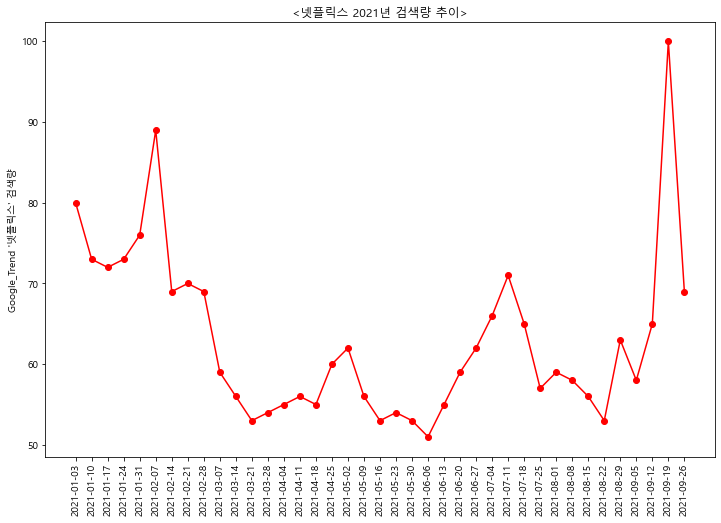

In [66]:
# 구글 트렌드 갖고, 넷플릭스 추세
plt.figure(figsize=(12,8))
plt.plot(go_search['time'],go_search['넷플릭스'],'r-o')
plt.xticks(rotation=90)
plt.ylabel("Google_Trend '넷플릭스' 검색량")
plt.title('<넷플릭스 2021년 검색량 추이>')
plt.show()

## 넷플릭스 오리지널 콘텐츠 그룹의 카카오+ 구글 검색량 총합 추이

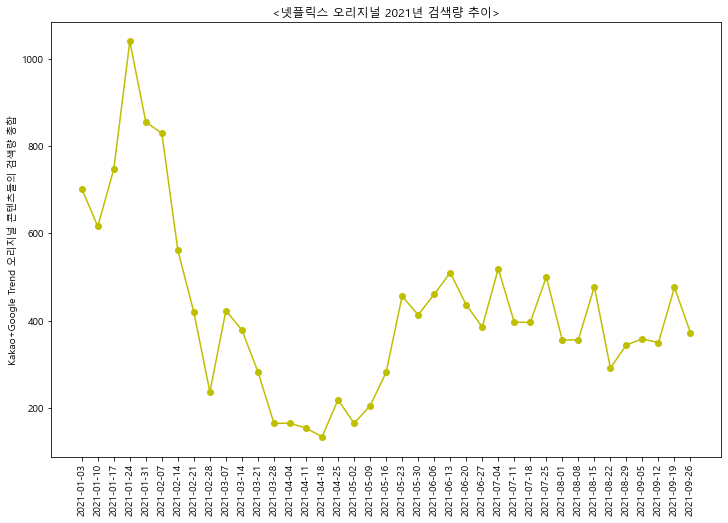

In [63]:
# 넷플릭스 오리지널 그룹의 카카오+ 구글 총합 검색량 추이

plt.figure(figsize=(12,8))
plt.plot(g_k_ssss.columns,values,'y-o')
plt.xticks(rotation=90)
plt.ylabel("Kakao+Google Trend 오리지널 콘텐츠들의 검색량 총합")
plt.title('<넷플릭스 오리지널 2021년 검색량 추이>')
plt.show()

## 넷플릭스 비 오리지널 콘텐츠 그룹, 카카오+ 구글 검색량 총합 추이

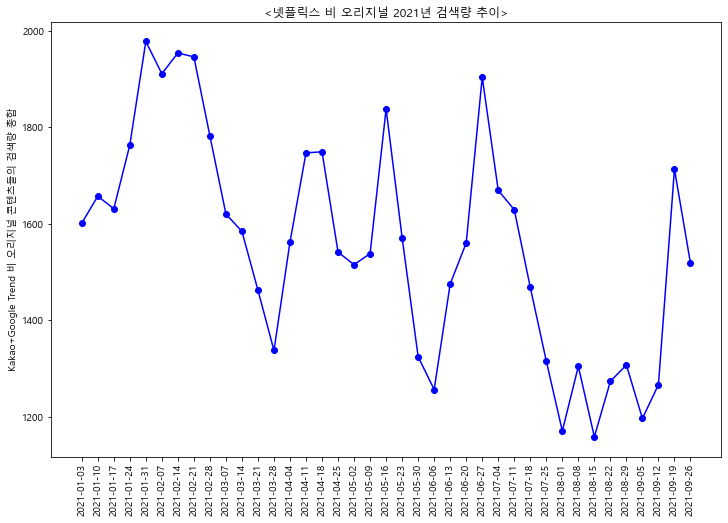

In [64]:
# 넷플릭스 비 오리지널 그룹의 카카오+ 구글 총합 검색량 추이

plt.figure(figsize=(12,8))
plt.plot(g_k_nsss.columns,n_values,'b-o')
plt.xticks(rotation=90)
plt.ylabel("Kakao+Google Trend 비 오리지널 콘텐츠들의 검색량 총합")
plt.title('<넷플릭스 비 오리지널 2021년 검색량 추이>')
plt.show()

-------
-------
-------

## 티빙 키워드의 구글 검색량 추이

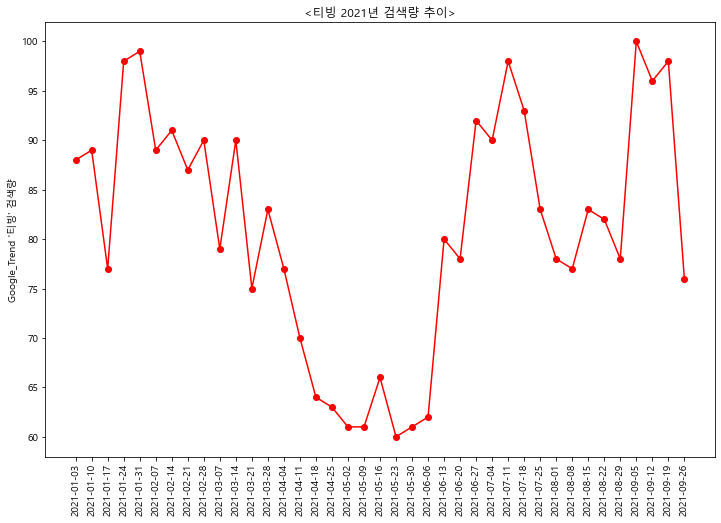

In [264]:
# 구글 트렌드 갖고, 티빙 추세
plt.figure(figsize=(12,8))
plt.plot(go_search['time'],go_search['티빙'],'r-o')
plt.xticks(rotation=90)
plt.ylabel("Google_Trend '티빙' 검색량")
plt.title('<티빙 2021년 검색량 추이>')
plt.show()

## 티빙 오리지널 콘텐츠 그룹, 카카오+ 구글 검색량 총합 추이

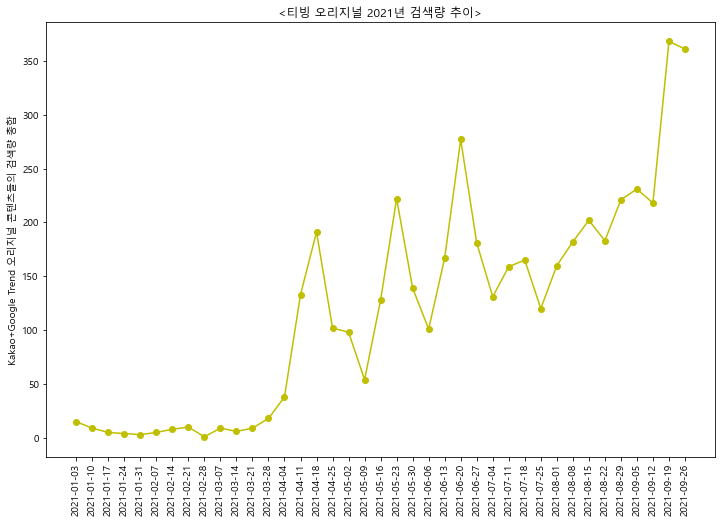

In [265]:
# 티빙 오리지널 그룹의 카카오+ 구글 총합 검색량 추이

plt.figure(figsize=(12,8))
plt.plot(t_g_k_ssss.columns,t_values,'y-o')
plt.xticks(rotation=90)
plt.ylabel("Kakao+Google Trend 오리지널 콘텐츠들의 검색량 총합")
plt.title('<티빙 오리지널 2021년 검색량 추이>')
plt.show()

## 티빙 오리지널 콘텐츠 그룹, 카카오+ 구글 검색량 총합 추이

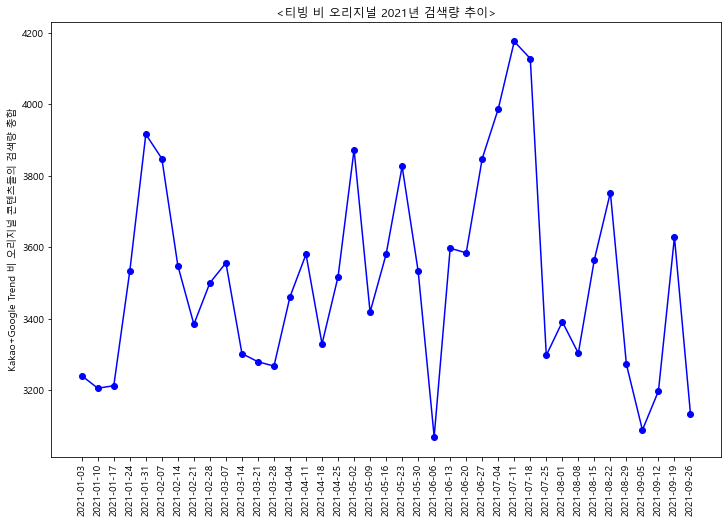

In [266]:
# 티빙 비 오리지널 그룹의 카카오+ 구글 총합 검색량 추이

plt.figure(figsize=(12,8))
plt.plot(t_g_k_nsss.columns,tn_values,'b-o')
plt.xticks(rotation=90)
plt.ylabel("Kakao+Google Trend 비 오리지널 콘텐츠들의 검색량 총합")
plt.title('<티빙 비 오리지널 2021년 검색량 추이>')
plt.show()

----

## 잠깐만! 검색량(y축값)의 기준은?

**검색량 지표의 기준**

- Google Trends : <시간 흐름에 따른 관심도 변화>
    
    수치는 특정 지역 및 기간을 기준으로 **차트에서 가장 높은 지점 대비 검색 관심도**를 나타냅니다. 값은 검색 빈도가 가장 높은 검색어의 경우 100, 검색 빈도가 그 절반 정도인 검색어의 경우 50, 해당 검색어에 대한 데이터가 충분하지 않은 경우 0으로 나타납니다.


- 카카오 데이터 트렌드 :

    설정된 기간과 기준(일간/주간/월간)으로 검색량 유입이 **가장 많은 기간을 100으로 한 상대적 비율**입니다.

----

**따라서**, 절대적인 값이 아니기 때문에, 보정이 필요함을 알 수 있습니다.
- 이 중 가장 단적인 예로, 최근 전세계적인 히트작, 9월의 **오징어 게임의 검색량을 보정**한다면, 훨씬 더 오리지널 콘텐츠가 넷플릭스의 검색량과 유의미한 연동이 되고 있다는 것을 알 수 있었습니다.

## (추가 실험) 오징어 게임 검색량을 보정해 시각화

**이중에서** 단연 압도적으로 인기를 구가한 콘텐츠라고 한다면, 
오징어 게임이므로 이 값 하나만을 보정해보기로 한 것입니다.

> > 보정하여, 오징어 게임의 검색량 값을 **5배**로 해서 그래프를 다시 그려 본다면? 

Q 몇 배의 값을 사용할지 고민, SNS 수치를 통해 오징어 인기의 배수를 대략적으로나마 계산해보자

In [274]:
## 오징어 게임 콘텐츠의 검색량 값을 5배로 하기

g_k_rsss = g_k_sss.T.copy()

g_k_rsss.drop(['오징어게임_x', '오징어게임_y'], axis =1, inplace = True)

g_k_rsss['오징어게임_x'] = list(np.array(g_k_sss.T['오징어게임_x'])*5)
g_k_rsss['오징어게임_y'] = list(np.array(g_k_sss.T['오징어게임_y'])*5)

g_k_rsss = g_k_rsss.T

In [275]:
g_k_rssss = g_k_rsss.dropna()

values_cali=[]
for col in list(g_k_rssss.columns):
    sum = []
    for val in g_k_rssss[col]:
        sum.append(float(str(val).replace('<1', '1'))) ## <1 1미만이라는 의미인 것인데, 0으로 버림할 수 없는 명백히 존재하는 수치이므로 1로 올림하기로 선택
    values_cali.append(np.array(sum).sum())

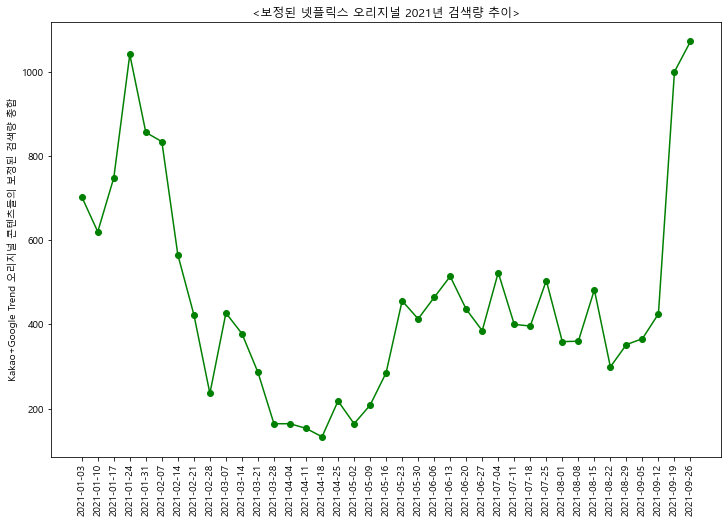

In [276]:
# 넷플릭스 오리지널 그룹의 카카오+ 구글 총합 검색량 추이

plt.figure(figsize=(12,8))
plt.plot(g_k_rssss.columns,values_cali,'g-o')
plt.xticks(rotation=90)
plt.ylabel("Kakao+Google Trend 오리지널 콘텐츠들의 보정된 검색량 총합")
plt.title('<보정된 넷플릭스 오리지널 2021년 검색량 추이>')
plt.show()

----

## (추가 가능성) SNS 지표를 가중을 주어 한계를 보완해보기

**<추가로 더 해보면 좋은 시도>**

**혹은 다른 지표를 합산** 
상대적인 값을 사용했기에, 오징어 게임이나 DP와 같이 최근 출시되어, 큰 인기를 얻고 있는 콘텐츠 검색 값이 제대로 반영되지 않는다.

> > 따라서, 데이터를 추가해서, **네이버 찜한 개수, 인스타와 페이스북 태그량을 가중치로 둔 값**을 구해보자

# 최종 평가 및 분석

## 오리지널 콘텐츠 여부에 따른 넷플릭스 검색량 추이 비교 총합

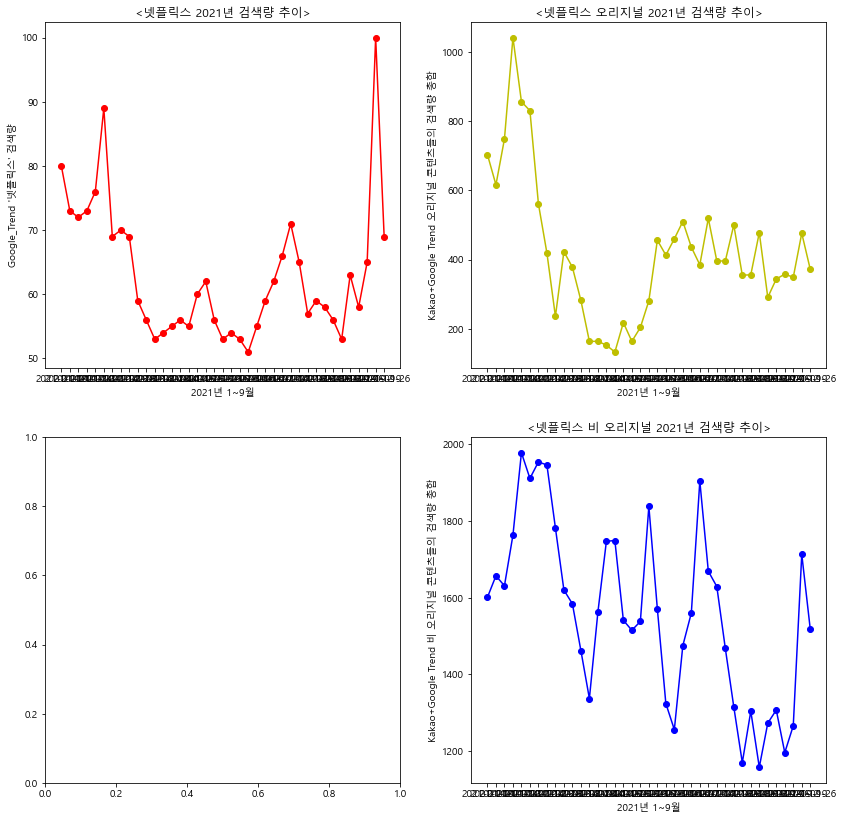

In [281]:
plt.figure(figsize=(14,14))

plt.subplot(221)
plt.plot(go_search['time'],go_search['넷플릭스'],'r-o')
# plt.xticks(rotation=90)
plt.xlabel("2021년 1~9월")
plt.ylabel("Google_Trend '넷플릭스' 검색량")
plt.title('<넷플릭스 2021년 검색량 추이>')

plt.subplot(222)
plt.plot(g_k_ssss.columns,values,'y-o')
# plt.xticks(rotation=90)
plt.xlabel("2021년 1~9월")
plt.ylabel("Kakao+Google Trend 오리지널 콘텐츠들의 검색량 총합")
plt.title('<넷플릭스 오리지널 2021년 검색량 추이>')

plt.subplot(223)
# plt.plot(g_k_rssss.columns,values_cali,'g-o')
# # plt.xticks(rotation=90)
# plt.xlabel("2021년 1~9월")
# plt.ylabel("오징어 게임을 검색량 5배 한 검색량 총합")
# plt.title('<보정된 넷플릭스 오리지널 2021년 검색량 추이>')

plt.subplot(224)
plt.plot(g_k_nsss.columns,n_values,'b-o')
# plt.xticks(rotation=90)
plt.xlabel("2021년 1~9월")
plt.ylabel("Kakao+Google Trend 비 오리지널 콘텐츠들의 검색량 총합")
plt.title('<넷플릭스 비 오리지널 2021년 검색량 추이>')

plt.show()

**즉,  Google과 카카오 검색량에 비추어볼 때,
넷플릭스라는 OTT 경우, 오리지널 콘텐츠와 Netflix 플랫폼 검색량이 연동되고 있다.**

> **따라서 이 같은 맥락에서 볼 때, 넷플릭스는,
> 오리지널 콘텐츠 제작에 열을 올리는 있는 현재의 양상이 해석되며, 또한 실제로 효과가 있는 전략임을 확인할 수 있다.**

---

## 오리지널 콘텐츠 여부에 따른 티빙 검색량 추이 비교 총합

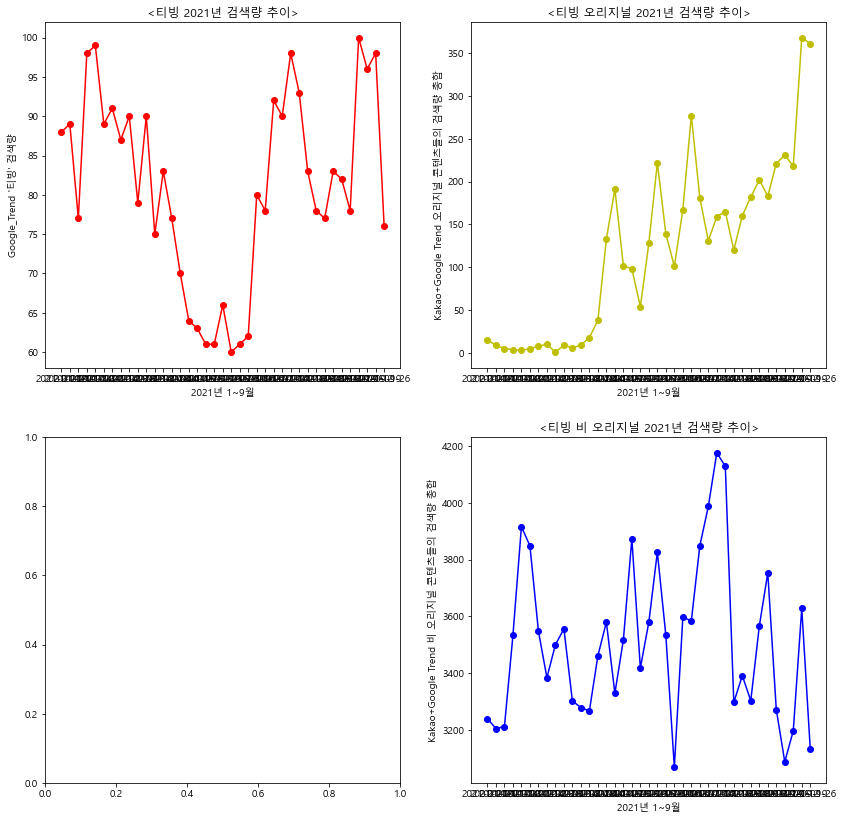

In [278]:
plt.figure(figsize=(14,14))

plt.subplot(221)
plt.plot(go_search['time'],go_search['티빙'],'r-o')
# plt.xticks(rotation=90)
plt.xlabel("2021년 1~9월")
plt.ylabel("Google_Trend '티빙' 검색량")
plt.title('<티빙 2021년 검색량 추이>')

plt.subplot(222)
plt.plot(t_g_k_ssss.columns,t_values,'y-o')
# plt.xticks(rotation=90)
plt.xlabel("2021년 1~9월")
plt.ylabel("Kakao+Google Trend 오리지널 콘텐츠들의 검색량 총합")
plt.title('<티빙 오리지널 2021년 검색량 추이>')

plt.subplot(223)
# plt.plot(g_k_rssss.columns,values_cali,'g-o')
# # plt.xticks(rotation=90)
# plt.xlabel("2021년 1~9월")
# plt.ylabel("Kakao+Google Trend 오리지널 콘텐츠들의 보정된 검색량 총합")
# plt.title('<보정된 넷플릭스 오리지널 2021년 검색량 추이>')

plt.subplot(224)
plt.plot(t_g_k_nsss.columns,tn_values,'b-o')
# plt.xticks(rotation=90)
plt.xlabel("2021년 1~9월")
plt.ylabel("Kakao+Google Trend 비 오리지널 콘텐츠들의 검색량 총합")
plt.title('<티빙 비 오리지널 2021년 검색량 추이>')

plt.show()

**반면,  Google과 카카오 검색량에 비추어볼 때,
티빙이라는 OTT 경우, 오리지널 콘텐츠의 유의미한 흥행 성장성을 확인할 수 있었지만, 
오리지널 콘텐츠와 Tving 플랫폼 검색량이 유의미한 연동을 보이고 있다고 볼 수 없었습니다.**

> 따라서 이 같은 맥락에서 볼 때, 티빙은, 올해 1월 <여고추리반>이라는 오리지널 콘텐츠를 기점으로 시작한 **이제 막 시작하는 단계**라는 상황임을 감안할 때, 오리지널 콘텐츠의 흥행성은 꾸준히 증가하고 있지만, 그것만의 **단독적인 효과라고 볼 수는 없다는 점**을 확인하였습니다.

> 또 오리지널 콘텐츠가 상대적으로 흥행하지 못할 때에도, **꾸준히 검색량이 유입되는 추이**로 보아, 오리지널 콘텐츠 이외의 다른 콘텐츠의 수요도 그에 못지 않거나 그보다 더 크다는 것을 추론해볼 수 있습니다.**

> 실제로, 티빙의 인기 콘텐츠 순위를 보면, **Top 6 중 5개가 티빙의 관계사인 tvn, mnet의 드라마와 예능이 차지**하고 있음을 확인할 수 있습니다. 따라서 위에서 추론했던 것처럼, 티빙이라는 OTT 특성상 티빙 오리지널 이외의 콘텐츠에도 충분히 수요를 이끌고 있다는 것을 확인할 수 있었습니다.**

> 그러나, 이제 막 오리지널 콘텐츠를 제작하기 시작했다는 점과, 그 **오리지널 검색량이 꾸준히 늘어가는 추세**를 함께 보았을 때으로 점차 오리지널 콘텐츠의 투자를 확대하겠다는 기업의 행보도 충분히 **유의미한 선택**이 될 것임을 예상해볼 수 있었습니다.**

----

## 최종 결론

- 따라서, 기업의 특성에 따라 시각화 **결과는 다르게** 나타났지만, 두 OTT 서비스 모두 **오리지널 콘텐츠의 중요성**을 인지하고, 확장해나간다는 사실을 이를 통해 이해하고 확인할 수 있었습니다.